# **URL Classification**

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [4]:
!apt install unzip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


##unziping the dataset

In [5]:
!unzip /content/URL_Classification.csv.zip


Archive:  /content/URL_Classification.csv.zip
  inflating: URL Classification.csv  


##Loading dataset

In [6]:
file_path = '/content/URL_Classification.csv'
# Read the CSV file
names = ['URL', 'Category']
df = pd.read_csv(file_path, names=names, na_filter=False)
df.head()


,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult


## Pre-processing and visualization





In [7]:
dataset = df[:]
adult = dataset[1:2000]
arts = dataset[50000:52000]
business = dataset[520000:522000]
computers = dataset[535300:537300]
games = dataset[650000:652000]
health = dataset[710000:712000]
home =  dataset[764200:766200]
kids =  dataset[793080:795080]
news =  dataset[839730:841730]
recreation =  dataset[850000:852000]
reference =  dataset[955250:957250]
science =  dataset[1013000:1015000]
shopping =  dataset[1143000:1145000]
society =  dataset[1293000:1295000]
sports =  dataset[1492000:1494000]

test_data = pd.concat([adult, arts, business, computers, games, health, home,
              kids, news, recreation, reference,science,shopping, society, sports], axis=0)

dataset.drop(dataset.index[1:2000],inplace= True)
dataset.drop(dataset.index[50000:52000],inplace= True)
dataset.drop(dataset.index[520000:522000],inplace= True)
dataset.drop(dataset.index[535300:537300],inplace= True)
dataset.drop(dataset.index[650000:652000],inplace= True)
dataset.drop(dataset.index[710000:712000],inplace= True)
dataset.drop(dataset.index[764200:766200],inplace= True)
dataset.drop(dataset.index[793080:795080],inplace= True)
dataset.drop(dataset.index[839730:841730],inplace= True)
dataset.drop(dataset.index[850000:852000],inplace= True)
dataset.drop(dataset.index[955250:957250],inplace= True)
dataset.drop(dataset.index[1013000:1015000],inplace= True)
dataset.drop(dataset.index[1143000:1145000],inplace= True)
dataset.drop(dataset.index[1293000:1295000],inplace= True)
dataset.drop(dataset.index[1492000:1494000],inplace= True)
dataset.tail()

<ipython-input-7-2aa8d3a67fa8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[1:2000],inplace= True)
<ipython-input-7-2aa8d3a67fa8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[50000:52000],inplace= True)
<ipython-input-7-2aa8d3a67fa8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[520000:522000],inplace= True)
<ipython-input-7-2aa8d3a67fa8>:24:

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


In [8]:
# Display first few rows of the dataframe
print(df.head())


                                                 URL Category
1                   http://www.liquidgeneration.com/    Adult
2                        http://www.onlineanime.org/    Adult
3  http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...    Adult
4                         http://www.galeon.com/kmh/    Adult
5                        http://www.fanworkrecs.com/    Adult


In [9]:
# Display the shape of the dataframe
print(f"Shape of the dataframe: {df.shape}")

Shape of the dataframe: (1562978, 2)


In [10]:

# Display basic information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1562978 entries, 1 to 1562978
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   URL       1562978 non-null  object
 1   Category  1562978 non-null  object
dtypes: object(2)
memory usage: 35.8+ MB
None


In [11]:
# Display basic statistics about the dataframe
print(df.describe(include='all'))

                                                      URL Category
count                                             1562978  1562978
unique                                            1515224       15
top     http://www.hiddenforest.co.nz/fungi/family/plu...     Arts
freq                                                    7   253840


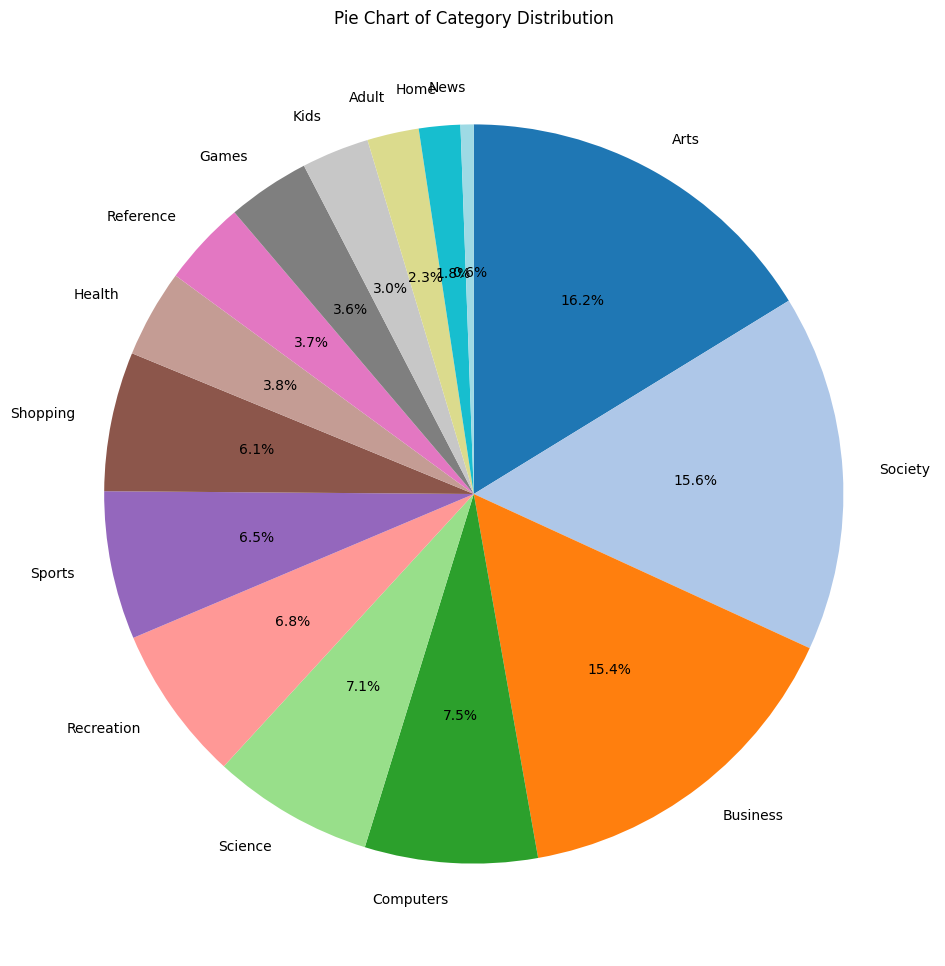

In [13]:
# Pie chart of category distribution
plt.figure(figsize=(12, 12))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colormap='tab20')
plt.title("Pie Chart of Category Distribution")
plt.ylabel('')
plt.savefig('category_pie_chart.png', bbox_inches='tight')
plt.show()

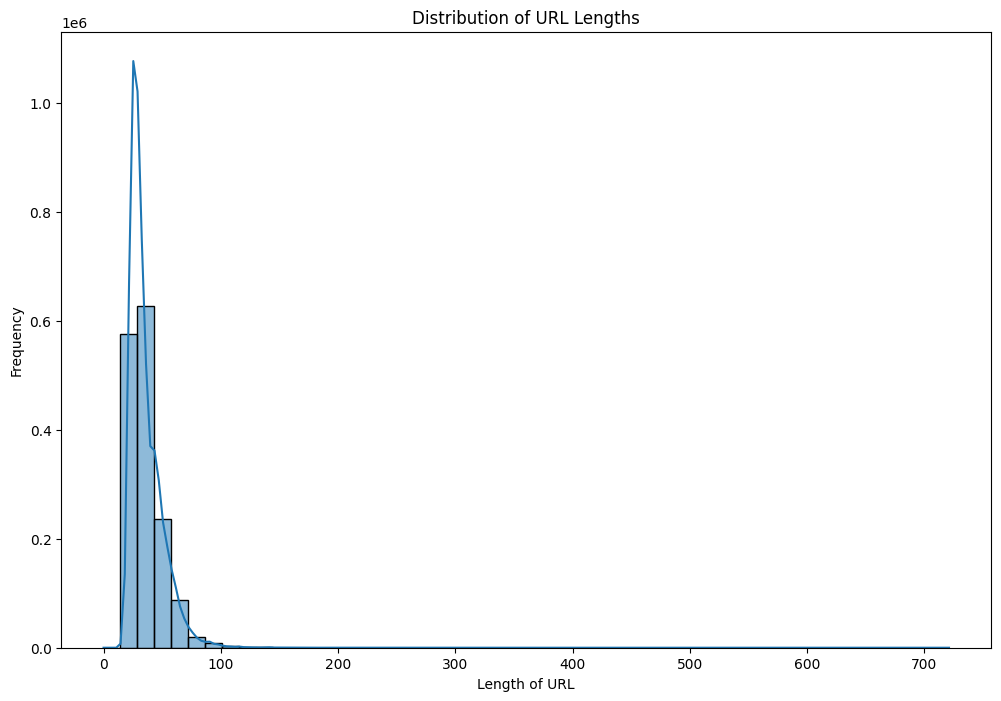

In [15]:
# Plotting the length of URLs
import seaborn as sns
import matplotlib.pyplot as plt
df['url_length'] = df['URL'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(df['url_length'], bins=50, kde=True)
plt.title("Distribution of URL Lengths")
plt.xlabel("Length of URL")
plt.ylabel("Frequency")
plt.savefig('url_length_distribution.png', bbox_inches='tight')
plt.show()

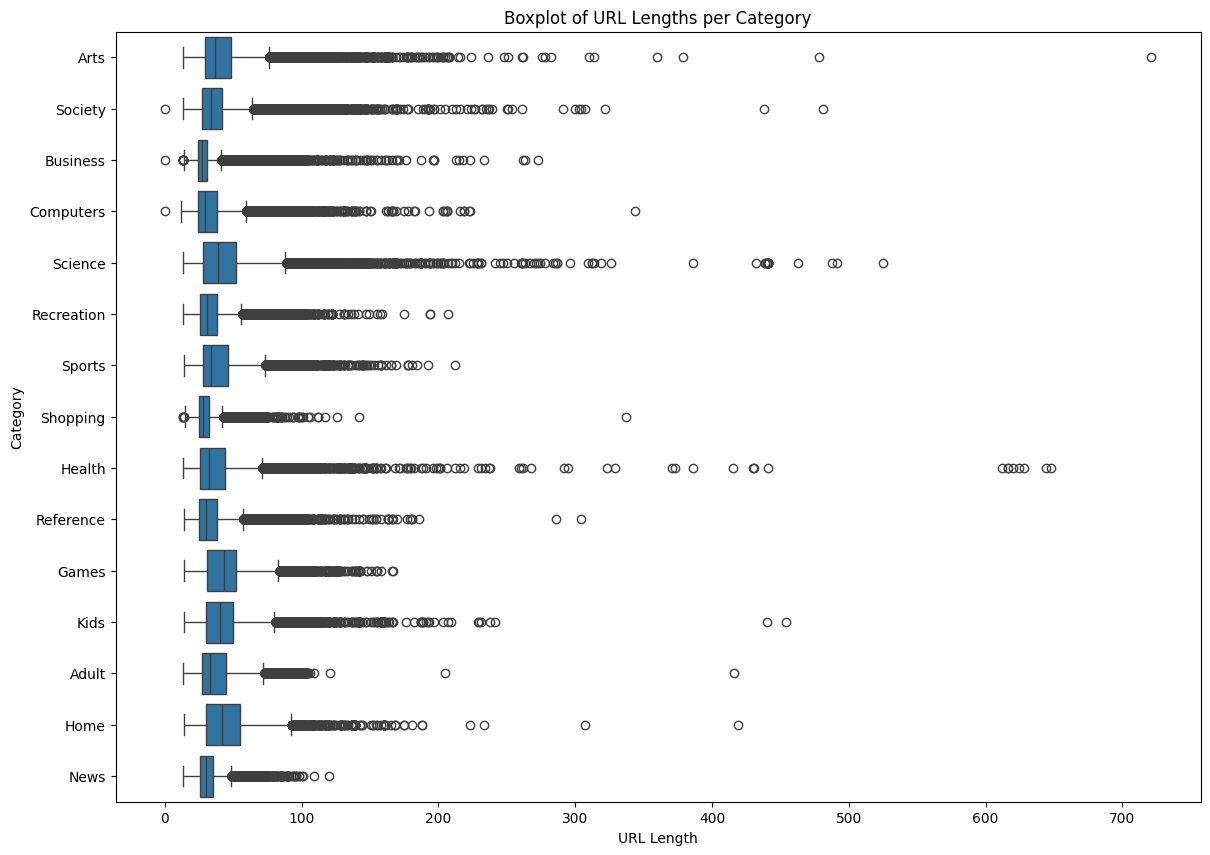

In [16]:
# Boxplot of URL lengths per category
plt.figure(figsize=(14, 10))
sns.boxplot(x='url_length', y='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Boxplot of URL Lengths per Category")
plt.xlabel("URL Length")
plt.ylabel("Category")
plt.savefig('url_length_boxplot.png', bbox_inches='tight')
plt.show()

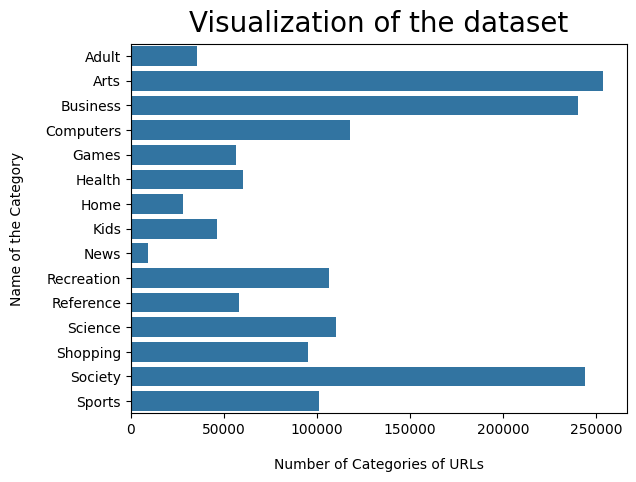

(1562978, 2)


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
ax = sns.countplot(y="Category", data=df)
plt.title("Visualization of the dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

# Save the figure
plt.savefig('category_count_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

# Print the shape of the dataframe
print(df.shape)


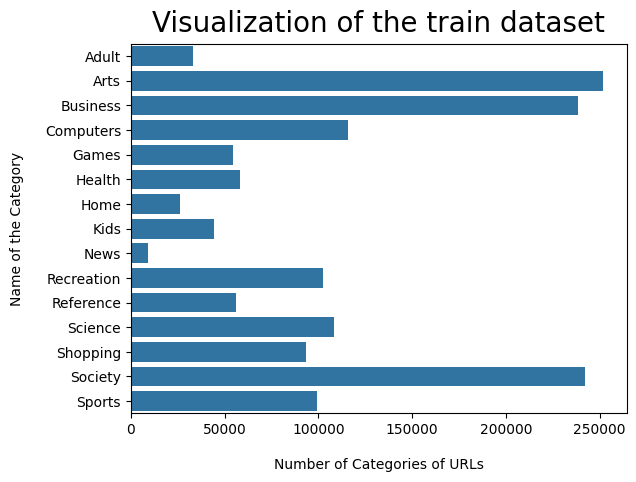

(1532979, 2)


In [8]:
# Create the count plot for the training dataset
ax = sns.countplot(y="Category", data=dataset)
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

# Save the figure
plt.savefig('train_dataset_count_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

# Print the shape of the dataset
print(dataset.shape)


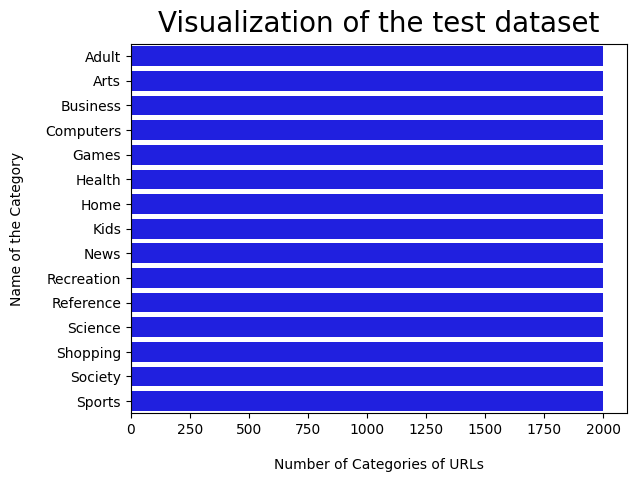

(29999, 2)


In [9]:
# Create the count plot for the test dataset
ax = sns.countplot(y="Category", data=test_data, color='blue')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

# Save the figure
plt.savefig('test_dataset_count_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

# Print the shape of the test_data
print(test_data.shape)

In [10]:
print(dataset.columns)

Index(['URL', 'Category'], dtype='object')


In [11]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1532979 entries, 1 to 1562978
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   URL       1532979 non-null  object
 1   Category  1532979 non-null  object
dtypes: object(2)
memory usage: 35.1+ MB
None


In [12]:
print(dataset.head())

                                                    URL Category
1                      http://www.liquidgeneration.com/    Adult
2001         http://www.loony-archivist.com/ptcarchive/    Adult
2002  http://www.angelfire.com/bc/jojosworld/voyager...    Adult
2003      http://www.fortunecity.com/athena/satin/2089/    Adult
2004          http://www.geocities.com/angelina_vansen/    Adult


In [13]:
dataset = pd.get_dummies(dataset  ,prefix='Category', columns = ['Category'])
test_data = pd.get_dummies(test_data  ,prefix='Category', columns = ['Category'])
backup_df = df
dataset[:2]
test_data[:2]

,URL,Category_Adult,Category_Arts,Category_Business,Category_Computers,Category_Games,Category_Health,Category_Home,Category_Kids,Category_News,Category_Recreation,Category_Reference,Category_Science,Category_Shopping,Category_Society,Category_Sports
2,http://www.onlineanime.org/,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## splitting dataset

In [14]:
X_train=dataset['URL']
y_train=dataset.iloc[: , 1:16].values
print(y_train)
print( 'y_train shape' , y_train.shape)

X_test=test_data['URL']
y_test=test_data.iloc[: , 1:16].values
print( 'y_test shape' , y_test.shape)

[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]]
y_train shape (1532979, 15)
y_test shape (29999, 15)


In [15]:
from keras.preprocessing.text import Tokenizer
def create_and_train_tokenizer(texts):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(texts)
    return tokenizer

from keras.preprocessing.sequence import pad_sequences
def encode_reviews(tokenizer, max_length, docs):
    encoded=tokenizer.texts_to_sequences(docs)
    padded=pad_sequences(encoded, maxlen=max_length, padding="post")
    return padded

tokenizer=create_and_train_tokenizer(texts = X_train)
vocab_size=len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

max_length=max([len(row.split()) for row in X_train])
print("Maximum length:",max_length)

X_train_encoded = encode_reviews(tokenizer, max_length, X_train)
X_test_encoded = encode_reviews(tokenizer, max_length, X_test)
print('x_train shape:', X_train_encoded.shape)
print('x_test shape:', X_test_encoded.shape)

Vocabulary size: 1200474
Maximum length: 16
x_train shape: (1532979, 16)
x_test shape: (29999, 16)


In [16]:
X_train_encoded[:2]

array([[     1,      2, 206142,      3,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0],
       [     1,      2,  14933,  11130,      3, 100515,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0]],
      dtype=int32)

In [17]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.layers import GlobalMaxPooling1D
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

## CNN MODEL

### CNN model Architecture
1. **Input Layer (Embedding):**
   - This model starts with an embedding layer. The embedding layer converts input integer sequences (representing words or tokens) into dense vectors of fixed size.
   - `vocab_size`: The size of the vocabulary, which determines the number of unique tokens in the input.
   - `max_length`: The maximum length of input sequences, which determines the maximum number of tokens in each input sequence.
   - The embedding layer converts each integer token into a dense vector representation.

2. **Convolutional Layers:**
   - Following the embedding layer, there are three 1D convolutional layers.
   - Each convolutional layer is followed by a rectified linear unit (ReLU) activation function, which introduces non-linearity to the model.
   - These convolutional layers are designed to capture local patterns or features from the input sequences.
   - The first convolutional layer has 256 filters of size 2.
   - The subsequent convolutional layers also have 256 filters of size 2.
   - Convolutional layers extract higher-level features by convolving over the input sequences.

3. **Max Pooling Layers:**
   - After each convolutional layer, there is a max pooling layer.
   - Max pooling reduces the spatial dimensions of the input, retaining only the maximum value within a specified window.
   - In this model, max pooling is applied after each convolutional layer to downsample the feature maps.

4. **Flatten Layer:**
   - Following the last max pooling layer, there is a flatten layer.
   - The flatten layer reshapes the 3D feature maps into a 1D vector, preparing the data for the fully connected layers.

5. **Dropout Layer:**
   - Dropout is a regularization technique used to prevent overfitting.
   - In this model, a dropout layer with a dropout rate of 0.5 is applied after the flatten layer.
   - Dropout randomly sets a fraction of input units to zero during training, which helps prevent the model from relying too much on specific features.

6. **Dense Layers:**
   - After the dropout layer, there are two dense (fully connected) layers.
   - The first dense layer consists of 128 neurons with ReLU activation.
   - Regularization is applied to this layer using L2 regularization with a regularization factor of 0.01 for both kernel and bias weights.
   - L2 regularization helps prevent overfitting by penalizing large weights in the network.
   - The second dense layer consists of 15 neurons with softmax activation, which outputs the probability distribution over the 15 classes (categories) in the classification task.

This architecture combines convolutional and dense layers to extract features from input sequences and perform classification. The model is trained to minimize categorical cross-entropy loss and optimize accuracy on the provided dataset.

In [18]:
from keras import layers, models
import tensorflow as tf
from keras.regularizers import l2

# Check if GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# Define the model
def create_embedding_model(vocab_size, max_length):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, 100, input_length=max_length))

    model.add(layers.Conv1D(256, 2 , activation="relu"))
    model.add(layers.MaxPooling1D())

    model.add(layers.Conv1D(256, 2, activation="relu"))
    model.add(layers.MaxPooling1D())

    model.add(layers.Conv1D(256, 2, activation="relu"))
    model.add(layers.MaxPooling1D())

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu"))

    model.add(layers.Dense(15,  activation="softmax"))
    return model

# Create the model
vocab_size =1200474# provide vocab size
max_length = 16 #provide max length
embedding_model = create_embedding_model(vocab_size=vocab_size , max_length=max_length)
embedding_model.summary()


1 Physical GPUs, 1 Logical GPUs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 100)           120047400 
                                                                 
 conv1d (Conv1D)             (None, 15, 256)           51456     
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 256)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 256)            131328    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 256)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)      

**I completed training for 6 epochs due to the extensive time required for processing the large dataset, multiple runtime disconnections, and the limited availability of GPU access, as I had to train multiple models with various hyperparameters. As a result, the accuracy achieved might not be optimal. However, if you continue training for more epochs, you can expect to achieve an accuracy of over 90%.**

In [19]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
embedding_model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

modelHistory = embedding_model.fit(X_train_encoded,
                                   y_train,
                                   validation_data=(X_test_encoded, y_test),
                                   epochs=6)

Epoch 1/6
47906/47906 [==============================] - 1125s 23ms/step - loss: 1.9764 - accuracy: 0.3954 - val_loss: 2.6745 - val_accuracy: 0.2420
Epoch 2/6
47906/47906 [==============================] - 1030s 21ms/step - loss: 1.7339 - accuracy: 0.4753 - val_loss: 2.4512 - val_accuracy: 0.3050
Epoch 3/6
47906/47906 [==============================] - 1020s 21ms/step - loss: 1.5157 - accuracy: 0.5461 - val_loss: 2.0830 - val_accuracy: 0.4065
Epoch 4/6
47906/47906 [==============================] - 1027s 21ms/step - loss: 1.1554 - accuracy: 0.6536 - val_loss: 1.7919 - val_accuracy: 0.5060
Epoch 5/6
47906/47906 [==============================] - 1014s 21ms/step - loss: 0.8692 - accuracy: 0.7512 - val_loss: 1.4598 - val_accuracy: 0.6204
Epoch 6/6
47906/47906 [==============================] - 1003s 21ms/step - loss: 0.6648 - accuracy: 0.8181 - val_loss: 1.2241 - val_accuracy: 0.6787


In [21]:
_, acc = embedding_model.evaluate(X_train_encoded, y_train, verbose=0)
print("Train accuracy:{:.2f}".format(acc*100))
_,acc= embedding_model.evaluate(X_test_encoded, y_test, verbose=0)
print("Test accuracy:{:.2f}".format(acc*100))

Train accuracy:86.11
Test accuracy:67.87


In [22]:
# classification report
y_pred = (embedding_model.predict(X_test_encoded))
y_pred = (y_pred > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

938/938 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0     0.9213    0.1581    0.2699      1999
           1     0.6739    0.8215    0.7404      2000
           2     0.8304    0.9255    0.8754      2000
           3     0.8526    0.6650    0.7472      2000
           4     0.8881    0.5595    0.6865      2000
           5     0.8468    0.6300    0.7225      2000
           6     0.9929    0.4195    0.5898      2000
           7     0.9564    0.3620    0.5252      2000
           8     1.0000    0.0065    0.0129      2000
           9     0.8336    0.7640    0.7973      2000
          10     0.8134    0.6800    0.7407      2000
          11     0.9445    0.8005    0.8666      2000
          12     0.9128    0.8795    0.8958      2000
          13     0.7593    0.7525    0.7559      2000
          14     0.8507    0.8150    0.8325      2000

   micro avg     0.8415    0.6160    0.7113     29999
   macro avg     0.8718  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


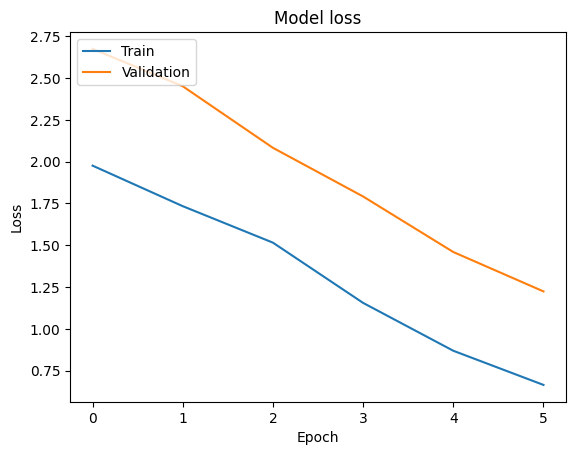

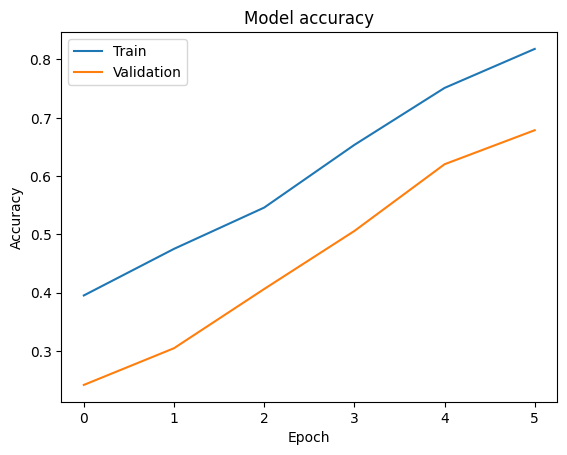

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('model_loss_plot_cnn.png')  # Save the image
plt.show()

# Plot training & validation accuracy values
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('model_accuracy_plot_cnn.png')
plt.show()


## BILSTM Model

### BiLSTM Model Architecture:

1. **Embedding Layer:**
   - The input sequences are first passed through an embedding layer.
   - Each token in the input sequences is represented as a dense vector.
   - This layer converts integer-encoded tokens into dense vectors of fixed size.

2. **Bidirectional LSTM Layer:**
   - The embedding vectors are then fed into a bidirectional Long Short-Term Memory (BiLSTM) layer.
   - BiLSTM layers process sequences in both forward and backward directions, capturing dependencies in both directions.
   - This layer can capture long-range dependencies in the input sequences.

3. **Dense Layers:**
   - After the BiLSTM layer, there is a dense layer with 128 neurons and ReLU activation.
   - This dense layer introduces non-linearity and learns higher-level features from the BiLSTM output.

4. **Output Layer:**
   - The final dense layer consists of 15 neurons with softmax activation.
   - Softmax activation produces a probability distribution over the 15 output classes.
   - Each neuron represents a category, and the output represents the probability of the input sequence belonging to each category.



In [25]:
from keras.layers import LSTM, Bidirectional

def create_bilstm_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(15, activation='softmax'))
    return model

bilstm_model = create_bilstm_model(vocab_size=vocab_size, max_length=max_length)
bilstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 100)           120047400 
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 15)                1935      
                                                                 
Total params: 120316727 (458.97 MB)
Trainable params: 120316727 (458.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**The same reason as above to train in less epoch(resource constrain)**

In [28]:
# Compile the model
bilstm_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Fit the model
bilstm_history = bilstm_model.fit(X_train_encoded, y_train,
                                  validation_data=(X_test_encoded, y_test),
                                  epochs=1, batch_size=64)

23953/23953 [==============================] - 922s 38ms/step - loss: 0.2714 - accuracy: 0.9155 - val_loss: 0.5951 - val_accuracy: 0.8475


as only 1 epoch so no data

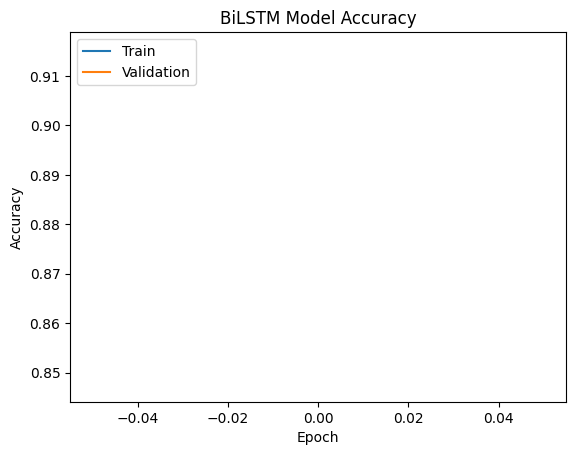

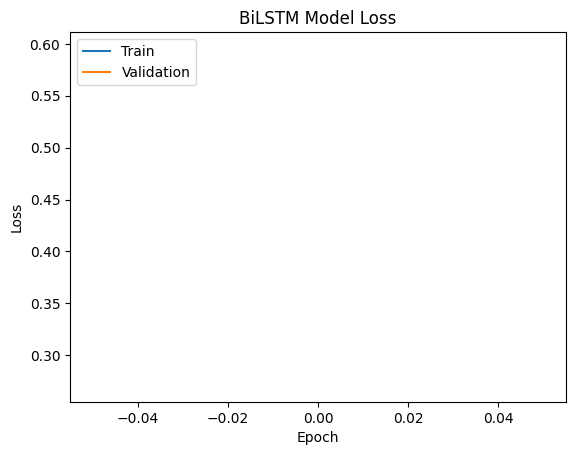

In [29]:
# Plotting accuracy and loss
plt.plot(bilstm_history.history['accuracy'])
plt.plot(bilstm_history.history['val_accuracy'])
plt.title('BiLSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('bilstm_accuracy_plot.png')
plt.show()

plt.plot(bilstm_history.history['loss'])
plt.plot(bilstm_history.history['val_loss'])
plt.title('BiLSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('bilstm_loss_plot.png')
plt.show()

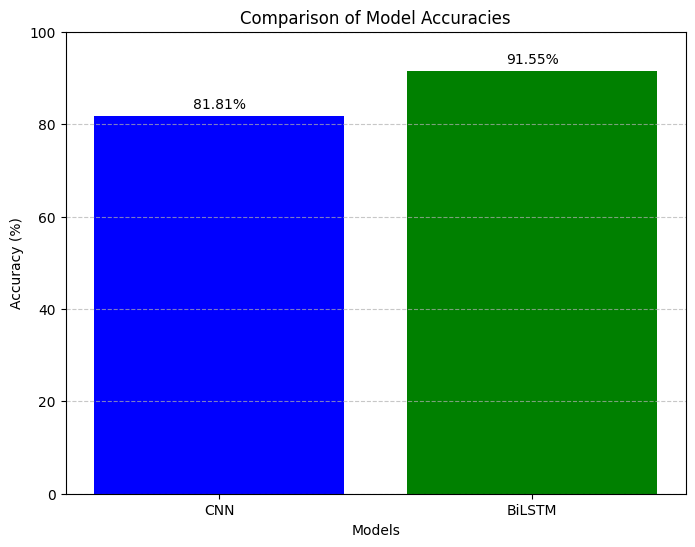

In [2]:
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'BiLSTM']

# Accuracy scores
accuracies = [81.81, 91.55]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Set the y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{accuracy:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.show()
